In [2]:
from google.colab import files
uploaded=files.upload()

Saving deliveries.csv to deliveries.csv


In [3]:
from google.colab import files
uploaded=files.upload()

Saving matches.csv to matches.csv


In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
matches = pd.read_csv("matches.csv")

In [7]:
deliveries = pd.read_csv("deliveries.csv")

In [8]:
matches.describe()

id       season  dl_applied  win_by_runs  win_by_wickets
count    756.000000   756.000000  756.000000   756.000000      756.000000
mean    1792.178571  2013.444444    0.025132    13.283069        3.350529
std     3464.478148     3.366895    0.156630    23.471144        3.387963
min        1.000000  2008.000000    0.000000     0.000000        0.000000
25%      189.750000  2011.000000    0.000000     0.000000        0.000000
50%      378.500000  2013.000000    0.000000     0.000000        4.000000
75%      567.250000  2016.000000    0.000000    19.000000        6.000000
max    11415.000000  2019.000000    1.000000   146.000000       10.000000

In [9]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [10]:
deliveries.describe()

match_id         inning  ...     extra_runs     total_runs
count  179078.000000  179078.000000  ...  179078.000000  179078.000000
mean     1802.252957       1.482952  ...       0.067032       1.313897
std      3472.322805       0.502074  ...       0.342553       1.605422
min         1.000000       1.000000  ...       0.000000       0.000000
25%       190.000000       1.000000  ...       0.000000       0.000000
50%       379.000000       1.000000  ...       0.000000       1.000000
75%       567.000000       2.000000  ...       0.000000       1.000000
max     11415.000000       5.000000  ...       7.000000      10.000000

[8 rows x 13 columns]

In [12]:
todayteam=matches[np.logical_or(np.logical_and(matches['team1']=='Kolkata Knight Riders',matches['team2']=='Royal Challengers Bangalore'),np.logical_and(matches['team2']=='Kolkata Knight Riders',matches['team1']=='Royal Challengers Bangalore'))]

In [13]:
todayteam

id  season  ...         umpire2                umpire3
26      27    2017  ...       CK Nandan                    NaN
44      45    2017  ...   C Shamshuddin                    NaN
59      60    2008  ...     RE Koertzen                    NaN
87      88    2008  ...       IL Howell                    NaN
133    134    2009  ...  TH Wijewardene                    NaN
155    156    2009  ...       SS Hazare                    NaN
177    178    2010  ...       AM Saheba                    NaN
216    217    2010  ...       DJ Harper                    NaN
257    258    2011  ...       RB Tiffin                    NaN
290    291    2011  ...       RB Tiffin                    NaN
316    317    2012  ...       RJ Tucker                    NaN
343    344    2012  ...     BR Doctrove                    NaN
391    392    2013  ...    AK Chaudhary                    NaN
440    441    2013  ...       K Srinath                    NaN
467    468    2014  ...     VA Kulkarni                    NaN
505    506    2014  ...       CK Nandan                    NaN
521    522    2015  ...   C Shamshuddin                    NaN
549    550    2015  ...       PG Pathak                    NaN
605    606    2016  ...          S Ravi                    NaN
623    624    2016  ...  A Nand Kishore                    NaN
638   7896    2018  ...    A.D Deshmukh                 S Ravi
664   7922    2018  ...  Anil Chaudhary  Virender Kumar Sharma
712  11153    2019  ...  Chris Gaffaney               O Nandan
730  11326    2019  ...     Nitin Menon          Anil Dandekar

[24 rows x 18 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


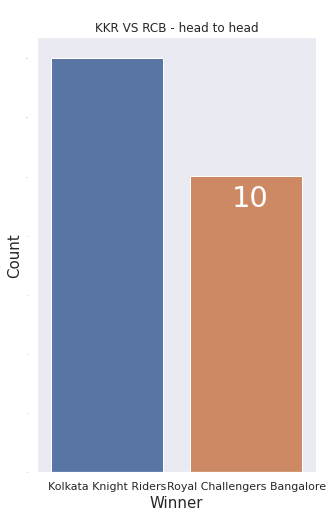

In [20]:
sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(5,8)
sns.countplot(todayteam['winner'],order=todayteam['winner'].value_counts().index)
plt.text(-0.1,15,str(todayteam['winner'].value_counts()['Kolkata Knight Riders']),size=29,color='white')
plt.text(0.9,9,str(todayteam['winner'].value_counts()['Royal Challengers Bangalore']),size=29,color='white')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.yticks(fontsize=0)
plt.title('KKR VS RCB - head to head')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


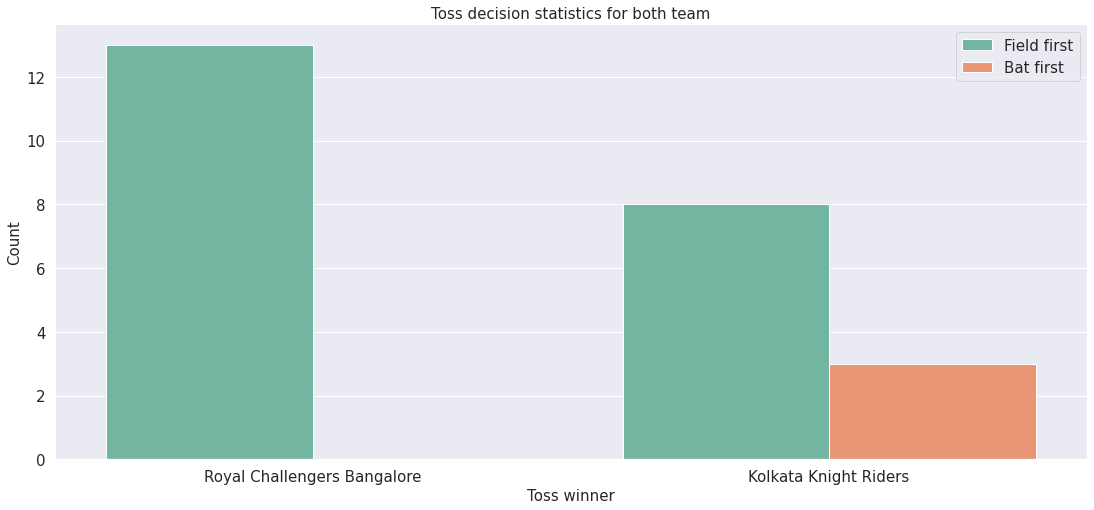

In [23]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(todayteam['toss_winner'],order=todayteam['toss_winner'].value_counts().index,palette='Set2',hue=matches['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)

plt.legend(['Field first','Bat first'],loc='best',fontsize=15)
plt.show()

bowling_team
Kolkata Knight Riders          2
Royal Challengers Bangalore    2
Name: noball_runs, dtype: int64

In [33]:
todaydel=deliveries[np.logical_or(np.logical_and(deliveries['batting_team']=='Kolkata Knight Riders',deliveries['bowling_team']=='Royal Challengers Bangalore'),np.logical_and(deliveries['bowling_team']=='Kolkata Knight Riders',deliveries['batting_team']=='Royal Challengers Bangalore'))]

In [34]:
todaydel

match_id  inning  ... dismissal_kind  fielder
6254          27       1  ...            NaN      NaN
6255          27       1  ...            NaN      NaN
6256          27       1  ...            NaN      NaN
6257          27       1  ...            NaN      NaN
6258          27       1  ...            NaN      NaN
...          ...     ...  ...            ...      ...
173253     11326       2  ...            NaN      NaN
173254     11326       2  ...            NaN      NaN
173255     11326       2  ...            NaN      NaN
173256     11326       2  ...        run out  V Kohli
173257     11326       2  ...            NaN      NaN

[5502 rows x 21 columns]

In [36]:
todaydel.groupby('bowling_team')['noball_runs'].nunique()

bowling_team
Kolkata Knight Riders          2
Royal Challengers Bangalore    2
Name: noball_runs, dtype: int64

In [37]:
todaydel['noball_runs'].mean()

0.004180298073427844

In [39]:
#performing hypothesis for noballs in today's match

#Ho: mean of noballs of past matches = mean of noball in today's match
#Ha: mean of noballs of past matches NOT EQUAL mean of noball in today's match

import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(todaydel['noball_runs'], x2=None, value=0.00418)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")



0.9997266052596131
accept null hypothesis


Accepting the null hypothesis, expected no balls today is 2. 1 from each innings.

In [46]:
todaydel['batsman']

6254       SP Narine
6255       SP Narine
6256       SP Narine
6257       SP Narine
6258       SP Narine
             ...    
173253        N Rana
173254    AD Russell
173255    AD Russell
173256    AD Russell
173257        N Rana
Name: batsman, Length: 5502, dtype: object

In [68]:
todaydel.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')